# Conhecimentos Técnicos - Cientista de Dados Oncase

### Este projeto de CLASSIFICAÇÃO é o 2º de  4 etapas do teste de conhecimento para vaga de cientista de dados da empresa Oncase.
Author: Dorivan Kadatz Borba<br>
Coding: utf-8<br>
Language: PT-BR

# Montando o driver e importando pacotes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importa os dados de treino e teste do google drive.
df_train = pd.read_csv("/content/drive/MyDrive/Oncase/classification_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Oncase/classification_test.csv")

In [ ]:
df_train

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1
...,...,...,...
665,0.690181,-0.800060,1
666,1.043712,-0.212964,1
667,1.821542,-0.406377,1
668,0.031938,1.424103,0


In [ ]:
df_train.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


In [ ]:
# Verificando a quantidade de observações, tipo dos dados e se existe dados nulos.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


In [ ]:
# Retorna a quantidade de observações para cada classe na variável 'target'.
pd.DataFrame(df_train.groupby(by='target')['target'].count())

,target
target,
0,331
1,339


In [ ]:
# o teste de Shapiro-Wilk atesta se os dados seguem uma distribuição gaussiana ou não.
# se p-valor > 0.05 assumimos que os dados são normalmente distribuídos.
def teste_normalidade(dados):
  stat, p = shapiro(dados)
  print(f'    Statistics: {stat:.3f}, p-valor: {p:.3f}')
  if p < 0.05:
      print('Os dados NÃO seguem uma distruibuição Gaussiana \n')
  else:
      print('Os dados seguem um distribuição Gaussiana \n')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


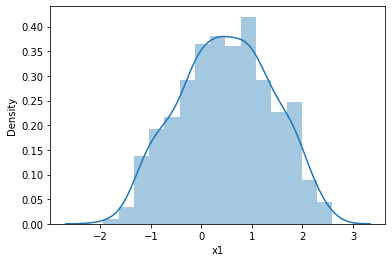

In [ ]:
# Gráfico de histograma de frequências da variável 'x1' dos dados de treino
sns.distplot(df_train['x1'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


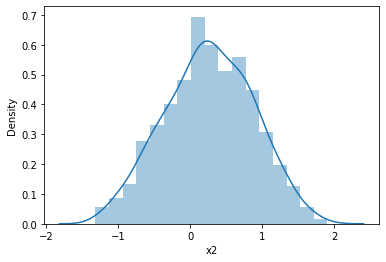

In [ ]:
# Gráfico de histograma de frequências da variável 'x2' dos dados de treino
sns.distplot(df_train['x2'])

In [ ]:
teste_normalidade(df_train['x1'])

    Statistics: 0.990, p-valor: 0.000
Os dados NÃO seguem uma distruibuição Gaussiana 



In [ ]:
teste_normalidade(df_train['x2'])

    Statistics: 0.996, p-valor: 0.055
Os dados seguem um distribuição Gaussiana 



- A variável 'x2' segue uma distribuição normal. Já a 'x1' visualmente segue uma distribuição normal, porém o teste de Shapiro wilk informa que não segue uma distribuição normal.
- Os dados apresentam classes bem balanceadas, contém quantidades quase iguais 331 e 339.
- Os dados estão totalmente prontos para iniciar a modelagem.

### Separando os dados para treino e validação
- Como já temos dados separados para o treino final, aqui separamos os dados para a primeira validação do modelo, depois usaremos os dados separados na daviável 'df_test' para a validação final.
 - será 80% dos dados para treino + 20% dos dados de treino para validação + validação final com 'df_test'.

# Base line com Naive Bayes

In [ ]:
# A variável X irá receber as variáveis independentes ou preditoras.
X = df_train.drop(columns='target')

# A variável y irá receber a variável terget, variável dependente ou predita.
y = df_train['target']

# Separamos os dados em treino 80% e teste 20% com train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Instancia o algorítimo Naive Bayes Gaussian
gnb = GaussianNB()

# Treina e o modelo com os dados de treino
gnb = gnb.fit(X_train, y_train)

# Testa o modelo com os dados de teste
y_pred = gnb.predict(X_test)

## Avaliação do modelo Naive

<img src = 'https://adenilsongiovanini.com.br/blog/wp-content/uploads/2019/12/imgem-com-precis%C3%A3o-e-acur%C3%A1cia-265x300.png' width = '250'>

In [ ]:
# Mostra a acurácia do modelo, acurácia é o quão próximo do valor real o modelo acertou.
metrics.accuracy_score(y_test, y_pred)

0.8432835820895522

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


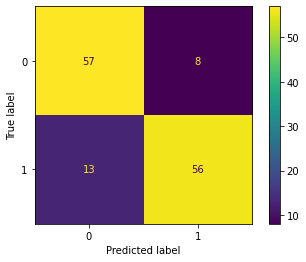

In [ ]:
# Matriz de confusão, retorna quantas classes o acertou e quantas errou, ótimo para verificar qual classe o modelo tem falhado mais.
plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()

In [ ]:
# Precisão é o a variabilidade/consistencia/desvio padrão dos dados é baixa, ter um modelo preciso não significa ser bom.
# não basta "chutar a bola no gol e só acertar a trave", precisão e acurácia andam juntas, ambas quanto maior melhor.
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8143    0.8769    0.8444        65
           1     0.8750    0.8116    0.8421        69

    accuracy                         0.8433       134
   macro avg     0.8446    0.8443    0.8433       134
weighted avg     0.8455    0.8433    0.8432       134



#### Em resumo:
- O modelo Naive Bayes obteve uma acurácia de 84%, precisão de 81% para a variável 'x1' e 87% para a variável 'x2'.
- A matriz de confusão mostra que o que era classe '0' o modelo acertou 57 e errou 8, e a classe '1' o modelo acertou 56 e errou 13.

# XGboost Classifier

In [ ]:
# Instancia o modelo na variável
xgb = XGBClassifier(objective='binary:logistic')

# Teina o modelo com os dados de treino
xgb.fit(X_train, y_train)

# Prediz os valores com os dados de teste
y_pred = xgb.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


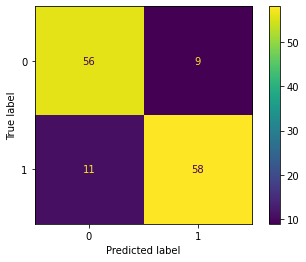

In [ ]:
# Gráfico da matriz de confusão
plot_confusion_matrix(xgb, X_test, y_test)  
plt.show()

In [ ]:
# Avalia a acurácia do modelo
metrics.accuracy_score(y_test, y_pred)

0.8507462686567164

In [ ]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8358    0.8615    0.8485        65
           1     0.8657    0.8406    0.8529        69

    accuracy                         0.8507       134
   macro avg     0.8507    0.8511    0.8507       134
weighted avg     0.8512    0.8507    0.8508       134



# Suport Vector Machine Classification(SVM-SVC)

In [ ]:
# Instancia o SVM
svc = SVC(gamma="auto")

# Treina o modelo
svc.fit(X_test, y_test)

# Prediz o modelo
y_pred = svc.predict(X_test)

In [ ]:
# Avalia a acurácia do modelo
metrics.accuracy_score(y_test, y_pred)

0.8731343283582089

In [ ]:
# Avalia a precisão, recall e f1-score
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8636    0.8769    0.8702        65
           1     0.8824    0.8696    0.8759        69

    accuracy                         0.8731       134
   macro avg     0.8730    0.8732    0.8731       134
weighted avg     0.8733    0.8731    0.8732       134



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


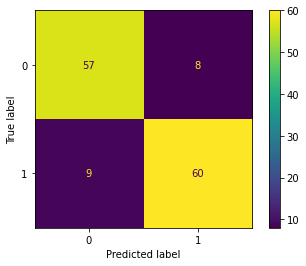

In [ ]:
# Gráfico da matriz de confusão
plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

# k-nearest neighbors Classifier(KNN)

In [ ]:
# Instancia o modelo na variável
neigh = KNeighborsClassifier()

# Treina o mdelo
neigh.fit(X_train, y_train)

# Prediz o modelo
y_pred = neigh.predict(X_test)

In [ ]:
# Avalia a acurácia do modelo
metrics.accuracy_score(y_test, y_pred)

0.8880597014925373

In [ ]:
# Avalia a precisão, recall e f1-score
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8788    0.8923    0.8855        65
           1     0.8971    0.8841    0.8905        69

    accuracy                         0.8881       134
   macro avg     0.8879    0.8882    0.8880       134
weighted avg     0.8882    0.8881    0.8881       134



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


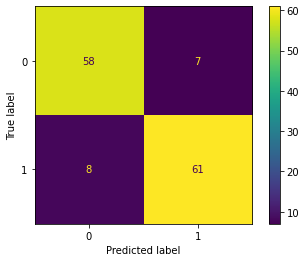

In [ ]:
# Gráfico da matriz de confusão
plot_confusion_matrix(neigh, X_test, y_test)  
plt.show()

- Propus aqui trazer alguns modelos de machine learning em sua forma 'crua', sem utilizar de tecnicas como grid search para tuning de parâmetros. Por muitas vezes o algoritmo influencia mais do que tais técnicas. o XGBoost que eu gosto tanto de usar acabou não trazendo o melhor resultado, perdendo até para o bom e velho KNN. Isso não significa que o XGboost é ruim, para esse data set o KNN se adaptou mais aos dados do que os algoritmos anteriores.

- O KNN nos entregou o resultado:
 - 0.88 de acurácia;
 - 0.86 de precisão para a classe '0' e 0.88 de precisção para a classe '1';
 - 10.7% de erro na classe '0';
 - 11.59% de erro na classe'1'.

- O modelo KNN errou em média 11.19% dos dados.

# Treinando com todos os dados para avaliar com os dados do data frame de teste

In [ ]:
# Instancia o modelo na variável
neigh = KNeighborsClassifier()

# Treina o mdelo
neigh.fit(X, y)

# Separa as variáveis independentes para previsão dos dados de teste
X_test = df_test.drop(columns='target')
# Spara a variável dependente dos dados de teste
y_test = df_test['target']

# Prediz o modelo
y_pred = neigh.predict(X_test)

In [ ]:
 # Cross validation com os dados de treino
 scores = cross_val_score(neigh, X, y, cv=5)

 print(' Cross Validation folds:', scores, '\n Score médio: ',round(scores.mean(), 4))

 Cross Validation folds: [0.87313433 0.93283582 0.85074627 0.8880597  0.86567164] 
 Score médio:  0.8821


In [ ]:
# Avalia a acurácia do modelo
round(metrics.accuracy_score(y_test, y_pred), 4)

0.8727

In [ ]:
# Avalia a precisão, recall e f1-score
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8802    0.8698    0.8750       169
           1     0.8650    0.8758    0.8704       161

    accuracy                         0.8727       330
   macro avg     0.8726    0.8728    0.8727       330
weighted avg     0.8728    0.8727    0.8727       330



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


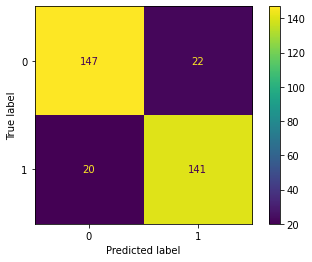

In [ ]:
# Gráfico da matriz de confusão
plot_confusion_matrix(neigh, X_test, y_test)  
plt.show()